In [2]:
import pandas as pd
from sklearn.datasets import load_files

In [3]:
data = load_files('wkp_sorted')

sentences = []

for file in data.filenames:
    with open(file, 'r') as f:
        sentences.append(f.read())
        # words = []
        # for line in f:
        #     words.extend(line.split())
        # first_15 = words[:15]
        # sentence = ' '.join(first_15)
        # sentences.append(sentence)


df = pd.DataFrame(sentences, columns=['Sentence'])
df['Label'] = data.target
df.to_csv('data2.csv')

print(df.head())


                                            Sentence  Label
0  The Cardiff Roller Collective (CRoC) are a rol...     11
1  "Go! Pack Go!" is the fight song of the Green ...     11
2  Al-Machriq (English translation: The East) was...     14
3  Ajman International Airport (Arabic: مطار عجما...      0
4  Kapla is a construction set for children and a...      4


In [4]:
idx_to_label = {index:data['target_names'][index] for index in range(len(data['target_names']))}
idx_to_label

{0: 'Airports',
 1: 'Artists',
 2: 'Astronauts',
 3: 'Astronomical_objects',
 4: 'Building',
 5: 'City',
 6: 'Comics_characters',
 7: 'Companies',
 8: 'Foods',
 9: 'Monuments_and_memorials',
 10: 'Politicians',
 11: 'Sports_teams',
 12: 'Sportspeople',
 13: 'Transport',
 14: 'Universities_and_colleges',
 15: 'Written_communication'}

In [5]:
# Word2Vec
# from scipy.linalg.special_matrices import triu
from gensim.models import Word2Vec

# Load data
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,Sentence,Label
0,0,The Cardiff Roller Collective (CRoC) are a rol...,11
1,1,"""Go! Pack Go!"" is the fight song of the Green ...",11
2,2,Al-Machriq (English translation: The East) was...,14
3,3,Ajman International Airport (Arabic: مطار عجما...,0
4,4,Kapla is a construction set for children and a...,4


In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

In [7]:

# Remove stopwords and punctuation
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words and w.isalpha()]
    return ' '.join(filtered_sentence)


data['Sentence'] = data['Sentence'].apply(remove_stopwords)
data.head()


d = []
for sentence in data['Sentence']:
    tok = []
    for word in word_tokenize(sentence):
        tok.append(word.lower())
    d.append(tok)


data['Tokenized'] = d
data.head()


,Unnamed: 0,Sentence,Label,Tokenized
0,0,The Cardiff Roller Collective CRoC roller spor...,11,"[the, cardiff, roller, collective, croc, rolle..."
1,1,Go Pack Go fight song Green Bay Packers first,11,"[go, pack, go, fight, song, green, bay, packer..."
2,2,English translation The East journal founded J...,14,"[english, translation, the, east, journal, fou..."
3,3,Ajman International Airport Arabic مطار عجمان ...,0,"[ajman, international, airport, arabic, مطار, ..."
4,4,Kapla construction set children adults The set...,4,"[kapla, construction, set, children, adults, t..."


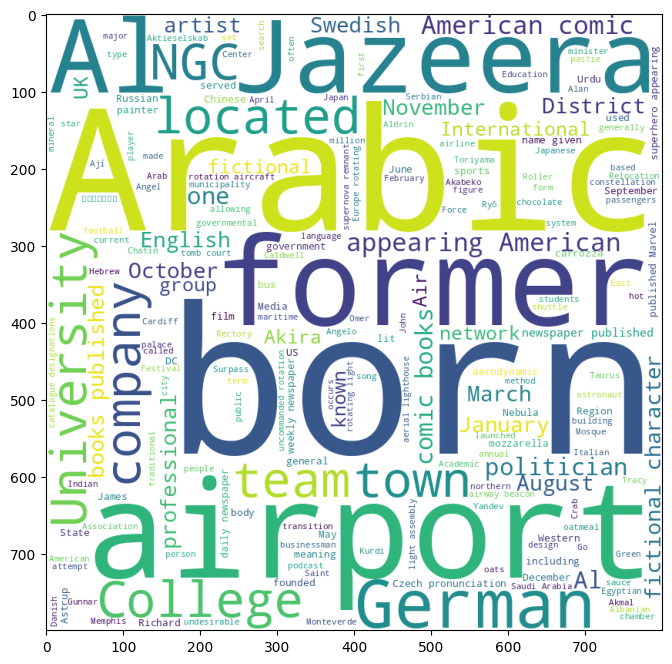

In [8]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(data['Sentence']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

In [9]:
# Bag of words (sg=0 by default)
model = Word2Vec(data['Tokenized'], window=5, min_count=1, workers=4)
model.save('word2vec.model')

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
model = Word2Vec.load('word2vec.model')
word_vectors = model.wv

In [12]:
# Mean of word vectors
def mean_vector(words, model):
    # remove out of vocabulary words
    words = [word for word in words if word in model.wv]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    else:
        return []
    
data['Mean_bow'] = data['Tokenized'].apply(lambda x: mean_vector(x, model))
data.head()

,Unnamed: 0,Sentence,Label,Tokenized,Mean_bow
0,0,The Cardiff Roller Collective CRoC roller spor...,11,"[the, cardiff, roller, collective, croc, rolle...","[-0.0012059944, 0.00057655765, 0.0004546229, 0..."
1,1,Go Pack Go fight song Green Bay Packers first,11,"[go, pack, go, fight, song, green, bay, packer...","[0.0023387286, 0.0013184368, 0.0018480197, 0.0..."
2,2,English translation The East journal founded J...,14,"[english, translation, the, east, journal, fou...","[-0.0027212065, 0.0029319907, 0.002298687, -0...."
3,3,Ajman International Airport Arabic مطار عجمان ...,0,"[ajman, international, airport, arabic, مطار, ...","[0.00021810588, 0.001563381, 0.0033868733, -0...."
4,4,Kapla construction set children adults The set...,4,"[kapla, construction, set, children, adults, t...","[0.00047397893, 0.0011637352, 0.003106683, -0...."


In [13]:
def get_word_embedding(word):
    if word in word_vectors:
        return word_vectors[word]
    else:
        return None

print(get_word_embedding('born'))

[-0.00890673  0.00379804  0.00540526  0.00575971  0.00763622 -0.00658095
  0.00122391  0.00658505 -0.0030115  -0.0063162  -0.00065082 -0.00874107
 -0.00555437  0.00718041  0.00336234  0.00702587  0.00687371  0.00734968
 -0.00380908 -0.00092663  0.00237582 -0.00446699  0.00843669 -0.00990702
  0.00669856  0.00285942 -0.00501882  0.00410763 -0.00189099  0.00677669
  0.01033512 -0.00422731 -0.00051873 -0.00571397  0.00377256  0.00299096
  0.00694263  0.00593086  0.00926467  0.00885638  0.00796829 -0.00702697
 -0.00898831 -0.00040543 -0.00309702  0.00786289  0.00587621 -0.00149669
  0.00167903  0.00208491  0.0079796  -0.0097493  -0.00034765  0.00350405
 -0.00127819  0.00868779  0.00915704  0.00658064 -0.00100174  0.00772634
 -0.00840041  0.00323704 -0.00466167 -0.00516575  0.00320986  0.00556944
  0.00780339 -0.00559631  0.00730526  0.00683595 -0.00373499 -0.00877698
  0.00579526  0.00655104 -0.00045591 -0.00670554 -0.00705848 -0.00255048
  0.0050111  -0.00358926 -0.00948344  0.00392089  0

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

def get_nearest_neighbors(word, model, top_n=10):
    # check the word exists in the model
    if word not in model.wv:
        raise ValueError(f"Word '{word}' not in the model vocabulary.")
    
    # Get embedding
    word_embedding = model.wv[word].reshape(1, -1)
    
    # cosine similarities between a word and all other words
    words = model.wv.index_to_key
    embeddings = model.wv[words]
    similarities = cosine_similarity(word_embedding, embeddings)[0]
    
    # Get the top 10 words with highest similarity
    top_indices = similarities.argsort()[-top_n-1:-1][::-1]  # Exclude the  word 
    nearest_neighbors = [(words[i], similarities[i]) for i in top_indices]
    
    return nearest_neighbors


nearest_neighbors = get_nearest_neighbors('born', model, top_n=10)
for neighbor, similarity in nearest_neighbors:
    print(f"Word: {neighbor}, Similarity: {similarity:.4f}")


Word: interactive, Similarity: 0.3670
Word: british, Similarity: 0.3127
Word: turkmen, Similarity: 0.2641
Word: nyustya, Similarity: 0.2377
Word: sudan, Similarity: 0.2354
Word: attention, Similarity: 0.2266
Word: explorers, Similarity: 0.2266
Word: finnish, Similarity: 0.2192
Word: writer, Similarity: 0.2191
Word: leathercraft, Similarity: 0.2183


In [16]:
nearest_neighbors = get_nearest_neighbors('arabic', model, top_n=10)
for neighbor, similarity in nearest_neighbors:
    print(f"Word: {neighbor}, Similarity: {similarity:.4f}")

Word: russian, Similarity: 0.3751
Word: patches, Similarity: 0.2775
Word: àiwōwo, Similarity: 0.2572
Word: pasty, Similarity: 0.2530
Word: founder, Similarity: 0.2512
Word: dibny, Similarity: 0.2337
Word: near, Similarity: 0.2301
Word: listed, Similarity: 0.2294
Word: jnua, Similarity: 0.2205
Word: artist, Similarity: 0.2202


In [17]:
nearest_neighbors = get_nearest_neighbors('former', model, top_n=10)
for neighbor, similarity in nearest_neighbors:
    print(f"Word: {neighbor}, Similarity: {similarity:.4f}")

Word: الدولي, Similarity: 0.3505
Word: awarded, Similarity: 0.2837
Word: uk, Similarity: 0.2729
Word: ikramov, Similarity: 0.2619
Word: institution, Similarity: 0.2424
Word: enigmatic, Similarity: 0.2406
Word: ethnic, Similarity: 0.2388
Word: april, Similarity: 0.2381
Word: devi, Similarity: 0.2339
Word: tripoli, Similarity: 0.2258


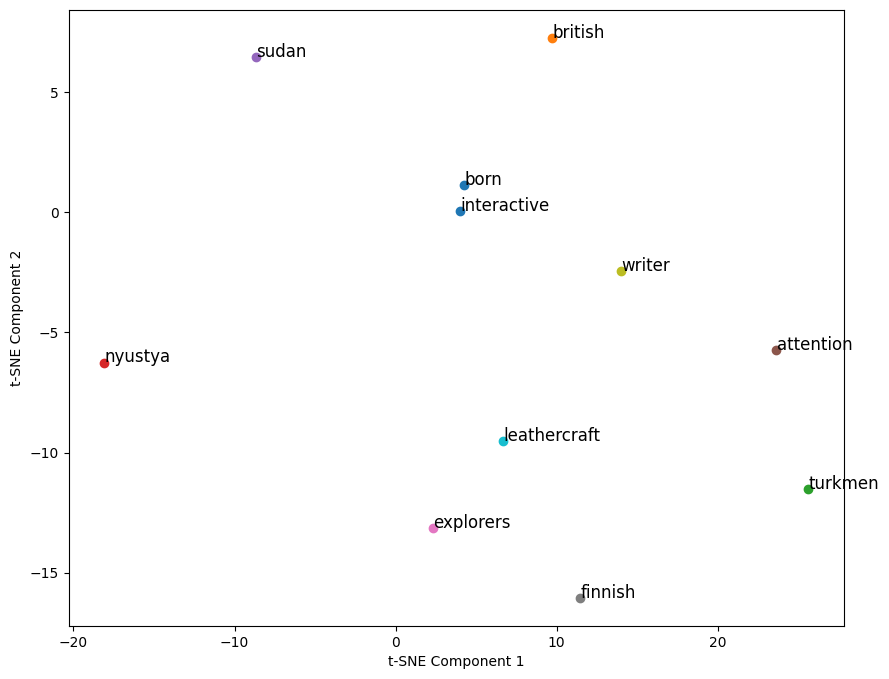

In [18]:
from sklearn.manifold import TSNE

def get_nearest_neighbors(word, model, top_n=10):
    if word not in model.wv:
        raise ValueError(f"Word '{word}' not in the model vocabulary.")
    
    word_embedding = model.wv[word].reshape(1, -1)
    words = model.wv.index_to_key
    embeddings = model.wv[words]
    similarities = cosine_similarity(word_embedding, embeddings)[0]
    
    top_indices = similarities.argsort()[-top_n-1:-1][::-1]
    nearest_neighbors = [(words[i], similarities[i]) for i in top_indices]
    
    return nearest_neighbors

# nearest neighbors of "born"
nearest_neighbors = get_nearest_neighbors('born', model, top_n=10)
similar_words = [word for word, _ in nearest_neighbors]
similar_words.append('born')  # Include the target word itself

# embeddings for the similar words
embeddings = np.array([model.wv[word] for word in similar_words])

# t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2)
X = tsne.fit_transform(word_vectors.vectors)


# 2D t-SNE embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(similar_words):
    x, y = X[i]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


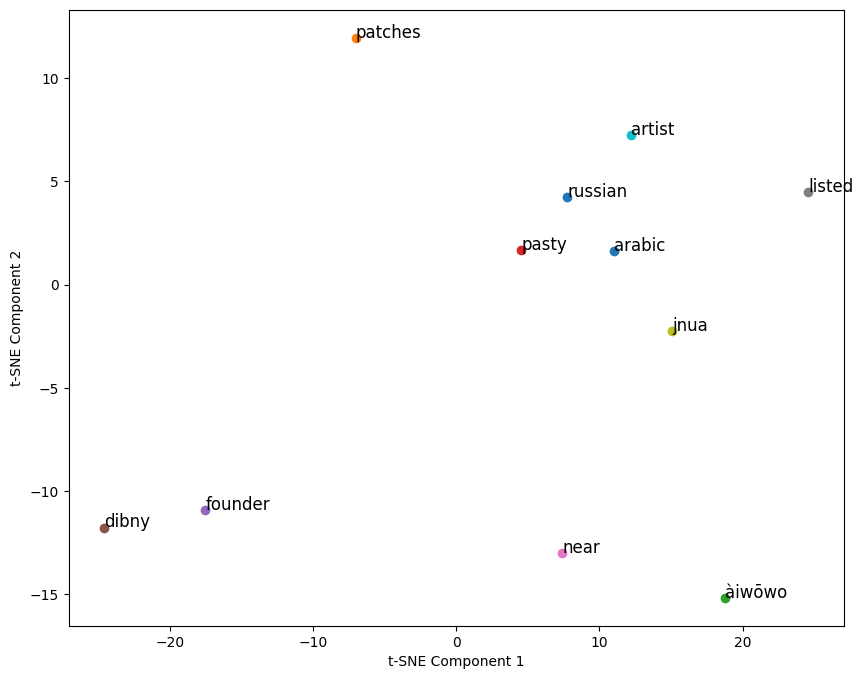

In [19]:
nearest_neighbors = get_nearest_neighbors('arabic', model, top_n=10)
similar_words = [word for word, _ in nearest_neighbors]
similar_words.append('arabic')  

# embeddings for the similar words
embeddings = np.array([model.wv[word] for word in similar_words])

# t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2)
X = tsne.fit_transform(word_vectors.vectors)


# 2D t-SNE embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(similar_words):
    x, y = X[i]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [20]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_similarity(word1, word2, model):
    if word1 not in model.wv:
        raise ValueError(f"Word '{word1}' not in the model vocabulary.")
    if word2 not in model.wv:
        raise ValueError(f"Word '{word2}' not in the model vocabulary.")
    
    embedding1 = model.wv[word1].reshape(1, -1)
    embedding2 = model.wv[word2].reshape(1, -1)
    
    return cosine_similarity(embedding1, embedding2)[0][0]

In [21]:
print(get_cosine_similarity('arabic', 'born', model))

-0.0155593855


In [22]:
words = model.wv.index_to_key
embeddings = model.wv[words]

In [25]:
# Faiss
import faiss

d = embeddings.shape[1]
index = faiss.IndexFlatL2(d)
index.add(embeddings)

def faiss_search(word, word_embeddings, index, words, k=5):
    if word not in word_embeddings:
        return f"Embedding for '{word}' not found."
    embedding = np.array([model.wv[word]])
    D, I = index.search(embedding, k)
    similar_words = [words[i] for i in I[0]]
    return similar_words

print(faiss_search('born', model.wv, index, words, k=10))

['born', 'interactive', 'british', 'leathercraft', 'turkmen', 'shuttle', 'sudan', 'roman', 'hradec', 'finnish']


In [26]:
print(faiss_search('arabic', model.wv, index, words, k=10))

['arabic', 'russian', 'patches', 'founder', 'àiwōwo', 'near', 'working', 'shuttle', 'التلميذ', 'received']
